## Análisis Exploratorio de 24 Horas de LeMans

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

le_mans= pd.read_csv("24LeMans.csv", encoding='latin-1')

In [19]:
le_mans.head(10)

,S.No,Hour,Car No.,Team,Drivers,Car,Category,Tyres,Laps,Total Time,Pitstops,Best Lap Number,Best LapTime,Best Lap Kph,Status
0,1,1,8,Toyota Gazoo Racing,S. BUEMI / B. HARTLEY / R. HIRAKAWA,Toyota GR010 HYBRID,HYPERCAR,M,12,01:01:15,0,10.0,03:29.7,234.0,Running
1,2,1,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,12,01:01:19,0,12.0,03:29.1,234.6,Running
2,3,1,7,Toyota Gazoo Racing,M. CONWAY / K. KOBAYASHI / J. LOPEZ,Toyota GR010 HYBRID,HYPERCAR,M,12,01:01:21,0,12.0,03:30.0,233.6,Running
3,4,1,75,Porsche Penske Motorsport,F. NASR / M. JAMINET / N. TANDY,Porsche 963,HYPERCAR,M,12,01:01:22,0,12.0,03:29.9,233.7,Running
4,5,1,6,Porsche Penske Motorsport,K. ESTRE / A. LOTTERER / L. VANTHOOR,Porsche 963,HYPERCAR,M,12,01:01:23,0,9.0,03:30.0,233.6,Running
5,6,1,5,Porsche Penske Motorsport,D. CAMERON / M. CHRISTENSEN / F. MAKOWIECKI,Porsche 963,HYPERCAR,M,12,01:01:23,0,9.0,03:30.1,233.5,Running
6,7,1,2,Cadillac Racing,E. BAMBER / A. LYNN / R. WESTBROOK,Cadillac V-Series.R,HYPERCAR,M,12,01:01:24,0,10.0,03:30.2,233.4,Running
7,8,1,93,Peugeot TotalEnergies,P. DI RESTA / M. JENSEN / J. VERGNE,Peugeot 9X8,HYPERCAR,M,12,01:01:25,0,10.0,03:30.1,233.5,Running
8,9,1,38,Hertz Team JOTA,A. DA COSTA / W. STEVENS / Y. YE,Porsche 963,HYPERCAR,M,12,01:01:26,1,10.0,03:29.5,234.2,Running
9,10,1,94,Peugeot TotalEnergies,L. DUVAL / G. MENEZES / N. MÜLLER,Peugeot 9X8,HYPERCAR,M,12,01:01:28,0,10.0,03:29.7,234.0,Running


* Información acerca del Conjunto de datos

In [20]:
le_mans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S.No             1486 non-null   int64  
 1   Hour             1486 non-null   int64  
 2   Car No.          1486 non-null   int64  
 3   Team             1486 non-null   object 
 4   Drivers          1486 non-null   object 
 5   Car              1485 non-null   object 
 6   Category         1486 non-null   object 
 7   Tyres            1485 non-null   object 
 8   Laps             1486 non-null   int64  
 9   Total Time       1486 non-null   object 
 10  Pitstops         1486 non-null   int64  
 11  Best Lap Number  1485 non-null   float64
 12  Best LapTime     1485 non-null   object 
 13  Best Lap Kph     1485 non-null   float64
 14  Status           1486 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 174.3+ KB


* Verificación sobre valores nulos en el conjunto de datos

In [21]:
le_mans.isnull().sum()

S.No               0
Hour               0
Car No.            0
Team               0
Drivers            0
Car                1
Category           0
Tyres              1
Laps               0
Total Time         0
Pitstops           0
Best Lap Number    1
Best LapTime       1
Best Lap Kph       1
Status             0
dtype: int64

* Verificación si hay valores duplicados

In [22]:
le_mans.duplicated().value_counts()

False    1486
Name: count, dtype: int64

In [23]:
le_mans.dropna(inplace = True)
le_mans.shape

(1483, 15)

#### EDA 

* Se eliminan número de serie 'S.No', 'Status' 

In [25]:
le_mans.drop(['S.No','Status'],inplace=True,axis=1)

* Distirbución mediante Boxplots 

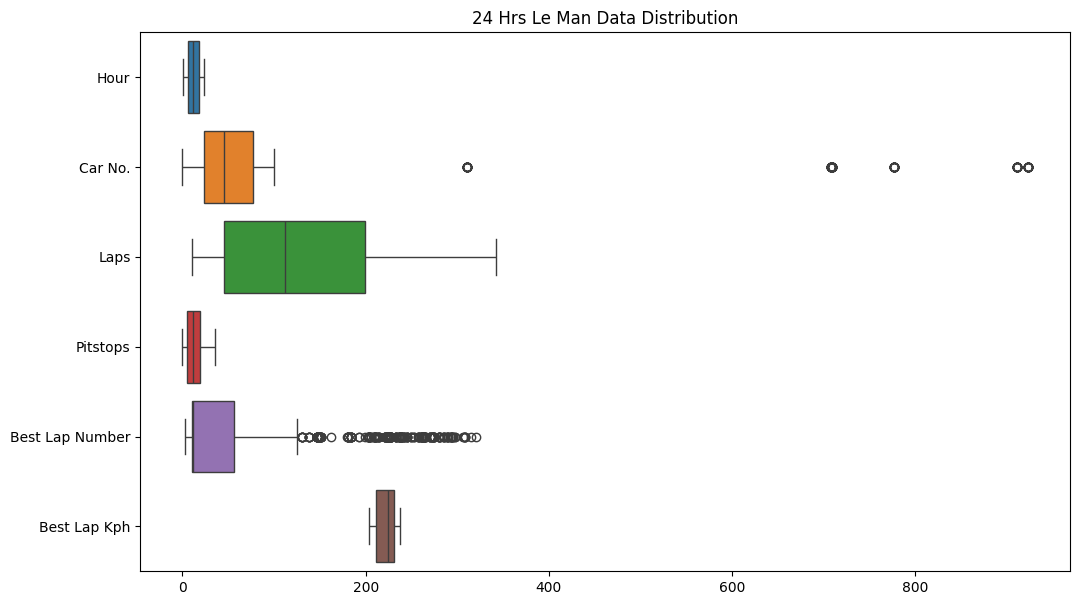

In [26]:
plt.figure(figsize=(12,7))
plt.title('24 Hrs Le Man Data Distribution')
sns.boxplot(le_mans.drop('Total Time',axis=1),orient='h')
plt.show()

* Vuelta más rápida y Vuelta más Lenta 

In [27]:
print('Fastest Lap Cover Time :',min(le_mans['Best LapTime']))
print('----------------------------------------')
print('Slowest Lap Cover Time :',max(le_mans['Best LapTime']))

Fastest Lap Cover Time : 03:27.0
----------------------------------------
Slowest Lap Cover Time : 04:00.3


* Número de equipos que participaron en LeMans

In [28]:

le_mans['Team'].nunique()

45

* Parada de Pits por cada competidor

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_2820\3341579049.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


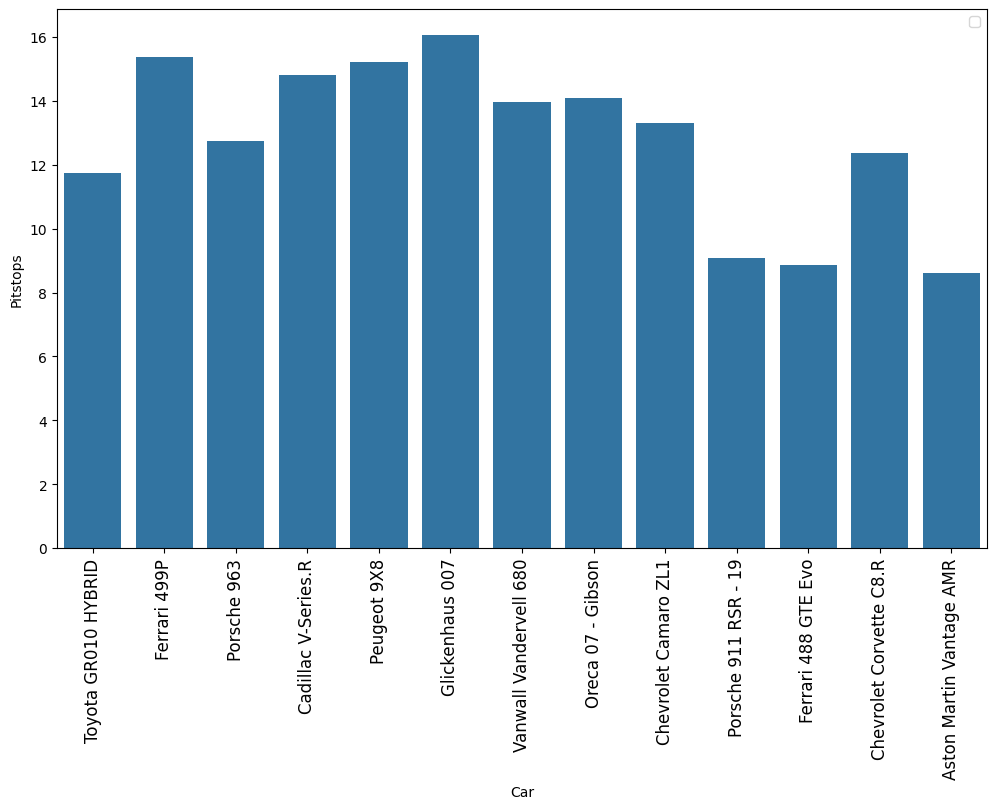

In [30]:
plt.figure(figsize=(12,7))
sns.barplot(data=le_mans,x='Car',y='Pitstops',errorbar=None)
plt.legend()
plt.xticks(rotation='vertical',size=12)
plt.show()

* Equipos que participaron

In [31]:
le_mans[['Team','Drivers']]

,Team,Drivers
0,Toyota Gazoo Racing,S. BUEMI / B. HARTLEY / R. HIRAKAWA
1,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI
2,Toyota Gazoo Racing,M. CONWAY / K. KOBAYASHI / J. LOPEZ
3,Porsche Penske Motorsport,F. NASR / M. JAMINET / N. TANDY
4,Porsche Penske Motorsport,K. ESTRE / A. LOTTERER / L. VANTHOOR
...,...,...
1481,Iron Lynx,C. SCHIAVONI / M. CRESSONI / A. PICARIELLO
1482,Proton Competition,R. HARDWICK / Z. ROBICHON / J. HEYLEN
1483,GMB Motorsport,G. BIRCH / M. SØRENSEN/ J. MØLLER
1484,AF Corse,S. MANN / J. PIGUET / U. DE PAUW


* Vehículo utilizado por equipo

In [33]:

le_mans[['Team','Car','Car No.','Category']]


,Team,Car,Car No.,Category
0,Toyota Gazoo Racing,Toyota GR010 HYBRID,8,HYPERCAR
1,Ferrari AF Corse,Ferrari 499P,51,HYPERCAR
2,Toyota Gazoo Racing,Toyota GR010 HYBRID,7,HYPERCAR
3,Porsche Penske Motorsport,Porsche 963,75,HYPERCAR
4,Porsche Penske Motorsport,Porsche 963,6,HYPERCAR
...,...,...,...,...
1481,Iron Lynx,Porsche 911 RSR - 19,60,LMGTE Am
1482,Proton Competition,Porsche 911 RSR - 19,16,LMGTE Am
1483,GMB Motorsport,Aston Martin Vantage AMR,55,LMGTE Am
1484,AF Corse,Ferrari 488 GTE Evo,21,LMGTE Am


In [37]:
le_mans['total_time'] = pd.to_datetime(le_mans['Total Time'],format='%H:%M:%S')
le_mans['total_time'] = le_mans['total_time'].dt.hour * 3600 + le_mans['total_time'].dt.minute * 60 + le_mans['total_time'].dt.second
le_mans['total_time'] = le_mans['total_time'].astype(float)
le_mans['total_time'].head(3)

0    3675.0
1    3679.0
2    3681.0
Name: total_time, dtype: float64

In [38]:
le_mans['Best LapTime'] = pd.to_datetime(le_mans['Best LapTime'],format='%M:%S.%f')
le_mans['Lap_record'] = le_mans['Best LapTime'].dt.minute * 60 + le_mans['Best LapTime'].dt.second + + le_mans['Best LapTime'].dt.microsecond / 1e6
le_mans['Lap_record']

0       209.7
1       209.1
2       210.0
3       209.9
4       210.0
        ...  
1481    231.4
1482    238.7
1483    236.2
1484    234.8
1485    219.1
Name: Lap_record, Length: 1483, dtype: float64

In [41]:
fecha_total = pd.to_datetime('2023-10-06')
fecha_lap   = pd.to_datetime('2023-11-06')

le_mans['DateTime_Total'] = fecha_total + pd.to_timedelta(
    le_mans['total_time'], unit='s'
)
le_mans['DateTime_Lap']   = fecha_lap   + pd.to_timedelta(
    le_mans['Lap_record'],   unit='s'
)


In [43]:
print('Fastest Covered lap :',min(le_mans['Lap_record']),'sec.')
print('-------------------------------')
print('Top Speed           :',max(le_mans['Best Lap Kph']),'Kph')

Fastest Covered lap : 207.0 sec.
-------------------------------
Top Speed           : 237.0 Kph


* Ganador

In [47]:
win = le_mans.loc[
    le_mans['Lap_record']==207.0,
    ['Car','Car No.','Team','Best Lap Kph',
     'Lap_record','DateTime_Total','DateTime_Lap']
]
(win)

,Car,Car No.,Team,Best Lap Kph,Lap_record,DateTime_Total,DateTime_Lap
1368,Ferrari 499P,50,Ferrari AF Corse,237.0,207.0,2023-10-06 23:06:18,2023-11-06 00:03:27
